### INTRO

In [ ]:
#INTRO
print('Hello World')
#suma y resta
print(1+2)
print(4-1)
#division y multiplicacion
print(24*56)
print(3234/52)
#Potencia
print(34**3)

#guarda valores en una variable
a=56
b=45
#halla a^b
print(a**b)


#crear un array con numpy
import numpy as np

datos=np.array([[2,4,5,6,7],[2,5,6,6,9],[4,2,3,56,78]])

print(datos)

#crea un vector con pandas
import pandas as pd
df=pd.DataFrame(datos)
df


Hello World
3
3
1344
62.19230769230769
39304
4660808027410506132900915088997417305944355117847144307414511042169984019070976
[[ 2  4  5  6  7]
 [ 2  5  6  6  9]
 [ 4  2  3 56 78]]


,0,1,2,3,4
0,2,4,5,6,7
1,2,5,6,6,9
2,4,2,3,56,78


#Instalar las librerias 

In [ ]:
#Aqui se instala la libreria de mapas 
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install basemap-data
!apt install proj-bin libproj-dev libgeos-dev
!pip install Basemap
#!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
     |████████████████████████████████| 30.5 MB 356 kB/s 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 1s (46.8 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for

In [ ]:
#Aqui se instala la version compatible para google colab
!pip install pyproj==1.9.6
from mpl_toolkits import basemap
print(basemap.__version__)

1.3.2


#Luego de instalar las librerias correspondientes se reinicia dando click en 'RESTART RUNTIME' y se prosigue con el codigo

## **Codigo para graficar la clorofila en el mar peruano**

Consideraciones del código:

*   El tiempo debe estar en días, y los meses deben comenzar siempre en el dia 1 i.e (1 de mayo de 2021)
*   Los datos a usar deben ser de CMEMS y en formato .nc
*   Se debe crear una carpeta llamada CLorofila donde se subiran 2 archivos: mapa_puertos.mat y el archivo nc de clorofila i.e (mayo_2021_pre.nc)
*   La funcion usada para hallar el promedio semanal es np.nanmean

In [ ]:
#primero hacemos la descarga de los datos de CMEMS 
#subirlos a la carpeta clorofila
!cd Clorofila
!ls
#con el comando !cd colocamos la ruta, en este caso Clorofila


/bin/bash: line 0: cd: Clorofila: No such file or directory
drive  sample_data


Importa las librerias antes de comenzar el codigo

In [ ]:
#importar
import os
from netCDF4 import Dataset
from datetime import date
import numpy as np
#from oceans.colormaps import cm
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/clorofila

/content/drive/MyDrive/clorofila


In [ ]:
#sacamos la ruta dando click derecho copiar ruta sobre el archivo NC que subimos
#path0="/content/sample_data/en_2022.nc"
fn="enero_2022/en_2022.nc"
data=Dataset(fn)




> Leemos el NC



In [ ]:
#vemos las caracteristicas de nuestro archivo NC
data.variables

{'CHL': <class 'netCDF4._netCDF4.Variable'>
 float32 CHL(time, lat, lon)
     _FillValue: -999.0
     input_files_reprocessings: Processors versions: MODIS 2018.1QLP/VIIRSN 2018.0QL+2018.0QLP/OLCIA 07.01+07.01NR/VIIRSJ1 2018.0.1QL+2018.0.1QLP/OLCIB 07.01+07.01NR
     long_name: Chlorophyll-a concentration - Mean of the binned pixels
     valid_min: 0.0
     missing_value: -999.0
     valid_max: 1000.0
     standard_name: mass_concentration_of_chlorophyll_a_in_sea_water
     units: milligram m-3
     type: surface
     _ChunkSizes: [  1 256 256]
     coordinates: time lat lon 
 unlimited dimensions: 
 current shape = (31, 721, 600)
 filling on, 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     long_name: latitude
     units: degrees_north
     axis: Y
     standard_name: latitude
     valid_min: -90.0
     valid_max: 90.0
     _ChunkSizes: 4320
     _CoordinateAxisType: Lat
 unlimited dimensions: 
 current shape = (721,)
 filling on, default _FillValue of 9.9692099683868

In [ ]:
#variables de long, latitud, tiempo
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
time = data.variables['time'][:]

print(time)

[44560. 44561. 44562. 44563. 44564. 44565. 44566. 44567. 44568. 44569.
 44570. 44571. 44572. 44573. 44574. 44575. 44576. 44577. 44578. 44579.
 44580. 44581. 44582. 44583. 44584. 44585. 44586. 44587. 44588. 44589.
 44590.]


In [ ]:
#encontrando el dia 1 o dia de creacion
creation_day = data.variables['time'].units[11:21]
#print('El dia de creacion fue ',creation_day)
yy=int(creation_day[:4]); mm=int(creation_day[5:7]); dd=int(creation_day[8:10])  
print('año de creacion:',yy); print('mes de creacion:',mm); print('dia de creacion:',dd)

año de creacion: 1900
mes de creacion: 1
dia de creacion: 1


In [ ]:
#fecha=date.fromordinal(int(time+np.array(date.toordinal(date(yy,mm,dd)))))

fecha=time+np.array(date.toordinal(date(yy,mm,dd)))
#Fecha en forma de vector de tiempo
fecha

masked_array(data=[738156., 738157., 738158., 738159., 738160., 738161.,
                   738162., 738163., 738164., 738165., 738166., 738167.,
                   738168., 738169., 738170., 738171., 738172., 738173.,
                   738174., 738175., 738176., 738177., 738178., 738179.,
                   738180., 738181., 738182., 738183., 738184., 738185.,
                   738186.],
             mask=False,
       fill_value=1e+20)

In [ ]:
#previsualizacion de los datos para el dia 1 del mes seleccionado
clorofila = data.variables['CHL'][:][0,:,:]
clorofila

masked_array(
  data=[[0.09752162545919418, 0.09156566113233566, 0.09854675829410553,
         ..., --, --, --],
        [0.08922959864139557, 0.09571629762649536, 0.0958041101694107,
         ..., --, --, --],
        [0.08783300966024399, 0.09418003261089325, 0.10087795555591583,
         ..., --, --, --],
        ...,
        [0.03117625042796135, 0.0317826084792614, 0.03201330825686455,
         ..., --, --, --],
        [0.03181147947907448, 0.03216671571135521, 0.032398611307144165,
         ..., --, --, --],
        [0.030707627534866333, 0.03146720305085182, 0.03146974369883537,
         ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=-999.0,
 

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [ ]:
area_centro=[-90,-65, -20, 5]
mp = Basemap(projection ='merc',
             llcrnrlon=int(area_centro[0]),
             llcrnrlat=int(area_centro[2]),
             urcrnrlon=int(area_centro[1]),
             urcrnrlat=int(area_centro[3]),
             resolution='i')

loni,lati = np.meshgrid(lon,lat)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


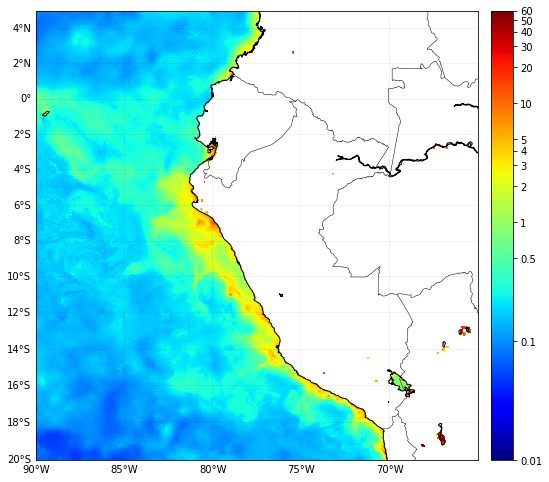

In [ ]:
fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)

cs = mp.pcolormesh(x, y, np.log10(clorofila), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawcountries()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')
plt.show()


# Puertos del Peru

In [ ]:
##Puertos
import scipy.io
#puertos = scipy.io.loadmat('/content/sample_data/mapa_puertos.mat')
puertos = scipy.io.loadmat('/content/drive/MyDrive/clorofila/mapa_puertos.mat')
lonp=puertos['lonpuertos']
latp=puertos['latpuertos']
lon_name=puertos['lonpuertos_text']
lat_name=puertos['latpuertos_text']
nombres_puertos=puertos['puertoselect']
sudamerica=puertos['sudamerica']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


{-90.0: ([<matplotlib.lines.Line2D at 0x7ff8e04e0e50>],
  [Text(2779.8718571170293, -28752.683550604295, '90°W')]),
 -85.0: ([<matplotlib.lines.Line2D at 0x7ff8e04e0e10>],
  [Text(558754.2432805229, -28752.683550604295, '85°W')]),
 -80.0: ([<matplotlib.lines.Line2D at 0x7ff8e0532590>],
  [Text(1114728.6147039288, -28752.683550604295, '80°W')]),
 -75.0: ([<matplotlib.lines.Line2D at 0x7ff8e0541e10>],
  [Text(1670702.9861273346, -28752.683550604295, '75°W')]),
 -70.0: ([<matplotlib.lines.Line2D at 0x7ff8e0532a90>],
  [Text(2226677.3575507407, -28752.683550604295, '70°W')])}

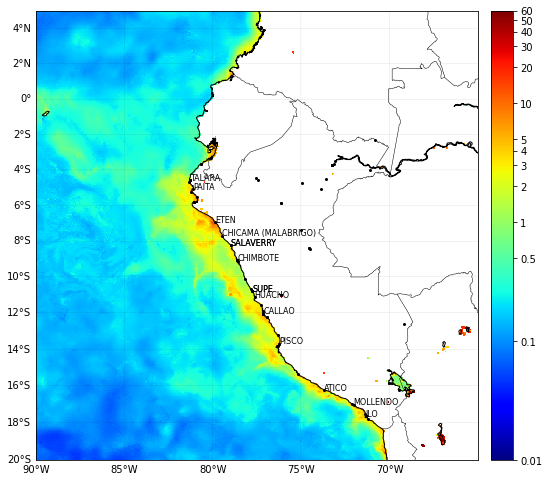

In [ ]:
df=pd.DataFrame(nombres_puertos)

fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(clorofila), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cc = plt.plot(x2, y2, 'o', color='black',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii][0],fontsize=8)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawcountries()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')



In [ ]:
#plt.plot(lonp, latp, 'o', color='blue',markersize=2);


# Datos Diarios de Clorofila

### Ploteamos los datos de Clorofila de manera diaria para observar los cambios de distribucion de clorofila debido a corrientes, viento, etc

In [ ]:
import time
import datetime

for kk in range(0,len(fecha)):
  dia=datetime.date.fromordinal(int(fecha[kk]))
  fig=plt.figure(figsize=(11.69,8.27))
  plt.clf()
  x,y = mp(loni,lati)
  x2,y2 = mp(lonp,latp)
  x3,y3 = mp(lon_name,lat_name)
  cs = mp.pcolormesh(x, y, np.log10(data.variables['CHL'][:][kk,:,:]), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
  cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
  cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
  for ii in range(0,len(df)):
    plt.text(x3[ii], y3[ii], df[0][ii][0],fontsize=6)

  cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
  cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

  mp.drawcoastlines()
  mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
  mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

  plt.text(0.6, 0.78, str(dia.strftime("%A %d %B %Y")), fontsize=13, transform=plt.gcf().transFigure)
  plt.pause(0.5)
  

plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Calculo de las semanas

In [ ]:
dt_inicio=datetime.date.fromordinal(int(fecha[0]))
dt_fin=datetime.date.fromordinal(int(fecha[-1]))

print('fecha de inicio: ', dt_inicio)
print('fecha ultima: ', dt_fin)

#se considera una semana como 7 días las 3 primeras semanas y la 4ta hasta donde alcance

fecha de inicio:  2022-01-01
fecha ultima:  2022-01-31


In [ ]:
ultimo_dia=int(dt_fin.day)-1
type(ultimo_dia)
#verificar que sea el ultimo dia sea tipo integer(int)

int

El cálculo del promedio semanal de clorofila se hizo de acuerdo a los 7 dias de la semana, por ejemplo en la primera linea de codigo : 'sem1=np.nanmean(data.variables['CHL'][:][0:6,:,:],axis=0)' , nos indica que se tomaran todos los valores de CHL durante el dato 0 al 6, esto representa los 7 días de la semana, ya que Python empieza a contar desde el 0 a diferencia de otros lenguajes como MATLAB que cuentan desde el 1

In [ ]:
sem1=np.nanmean(data.variables['CHL'][:][0:6,:,:],axis=0)
sem2=np.nanmean(data.variables['CHL'][:][7:13,:,:],axis=0)
sem3=np.nanmean(data.variables['CHL'][:][14:20,:,:],axis=0)
sem4=np.nanmean(data.variables['CHL'][:][21:ultimo_dia,:,:],axis=0)


El tiempo durante las semanas, se tomará el último dia de la semana para representar la semana, es decir si la fecha en el grafico es 7 de mayo 2021, representa un promedio de la semana desde el 1 al 7 de mayo.

In [ ]:
fecha_sem1=datetime.date.fromordinal(int(fecha[6]))
fecha_sem2=datetime.date.fromordinal(int(fecha[13]))
fecha_sem3=datetime.date.fromordinal(int(fecha[20]))
fecha_sem4=datetime.date.fromordinal(int(fecha[ultimo_dia]))

print(fecha_sem1.strftime("%A %d %B %Y"))
print(fecha_sem2.strftime("%A %d %B %Y"))
print(fecha_sem3.strftime("%A %d %B %Y"))
print(fecha_sem4.strftime("%A %d %B %Y"))


Friday 07 January 2022
Friday 14 January 2022
Friday 21 January 2022
Monday 31 January 2022


Text(0.6, 0.78, 'Friday 07 January 2022')

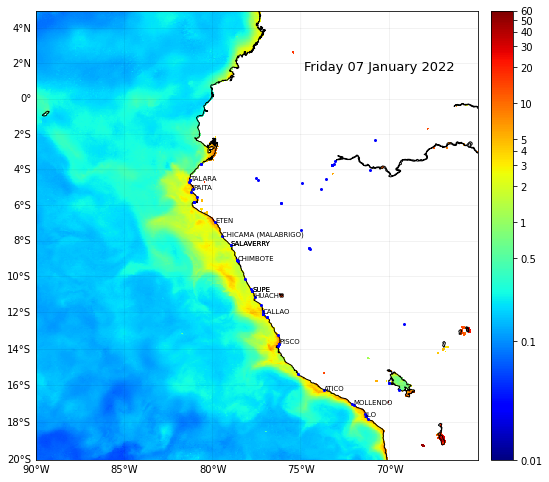

In [ ]:
fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem1), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii][0],fontsize=7)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.text(0.6, 0.78, str(fecha_sem1.strftime("%A %d %B %Y")), fontsize=13, transform=plt.gcf().transFigure)

Ahora haremos el subplot para tener las 4 semanas en una imagen

In [ ]:
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator

Primero probamos con 2 paneles

Text(0.6, 0.78, 'Friday 14 January 2022')

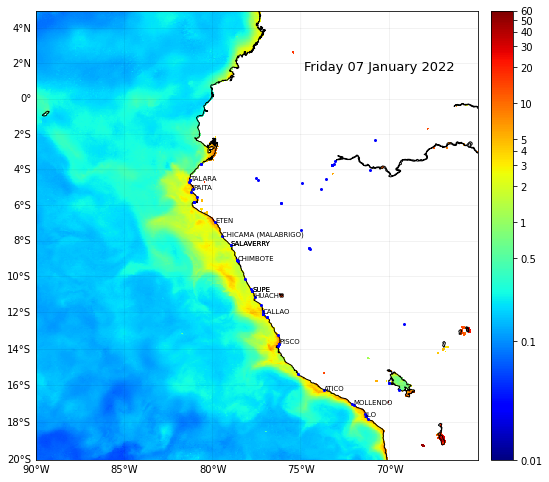

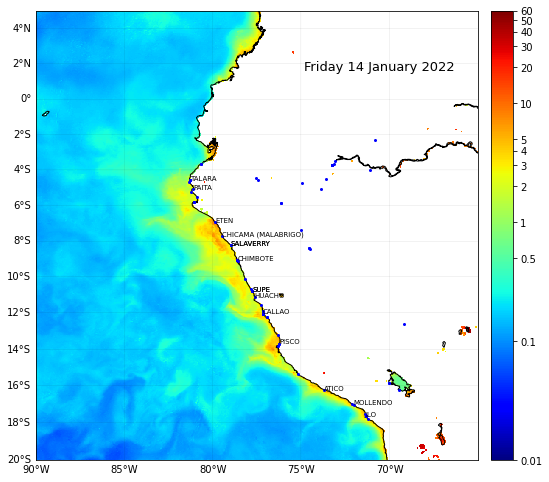

In [ ]:
# 2-panel plot, oriented vertically, colorbar on bottom.

rcParams['figure.subplot.hspace'] = 0.4 # more height between subplots
rcParams['figure.subplot.wspace'] = 0.5 # more width between subplots

# create new figure
#fig=plt.figure()
# panel 1
fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem1), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii][0],fontsize=7)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.text(0.6, 0.78, str(fecha_sem1.strftime("%A %d %B %Y")), fontsize=13, transform=plt.gcf().transFigure)


# panel 2
fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem2), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii][0],fontsize=7)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.text(0.6, 0.78, str(fecha_sem2.strftime("%A %d %B %Y")), fontsize=13, transform=plt.gcf().transFigure)




In [ ]:
str(fecha_sem2.strftime("%A %d %B %Y"))

'Friday 14 January 2022'

Ahora los 4 paneles

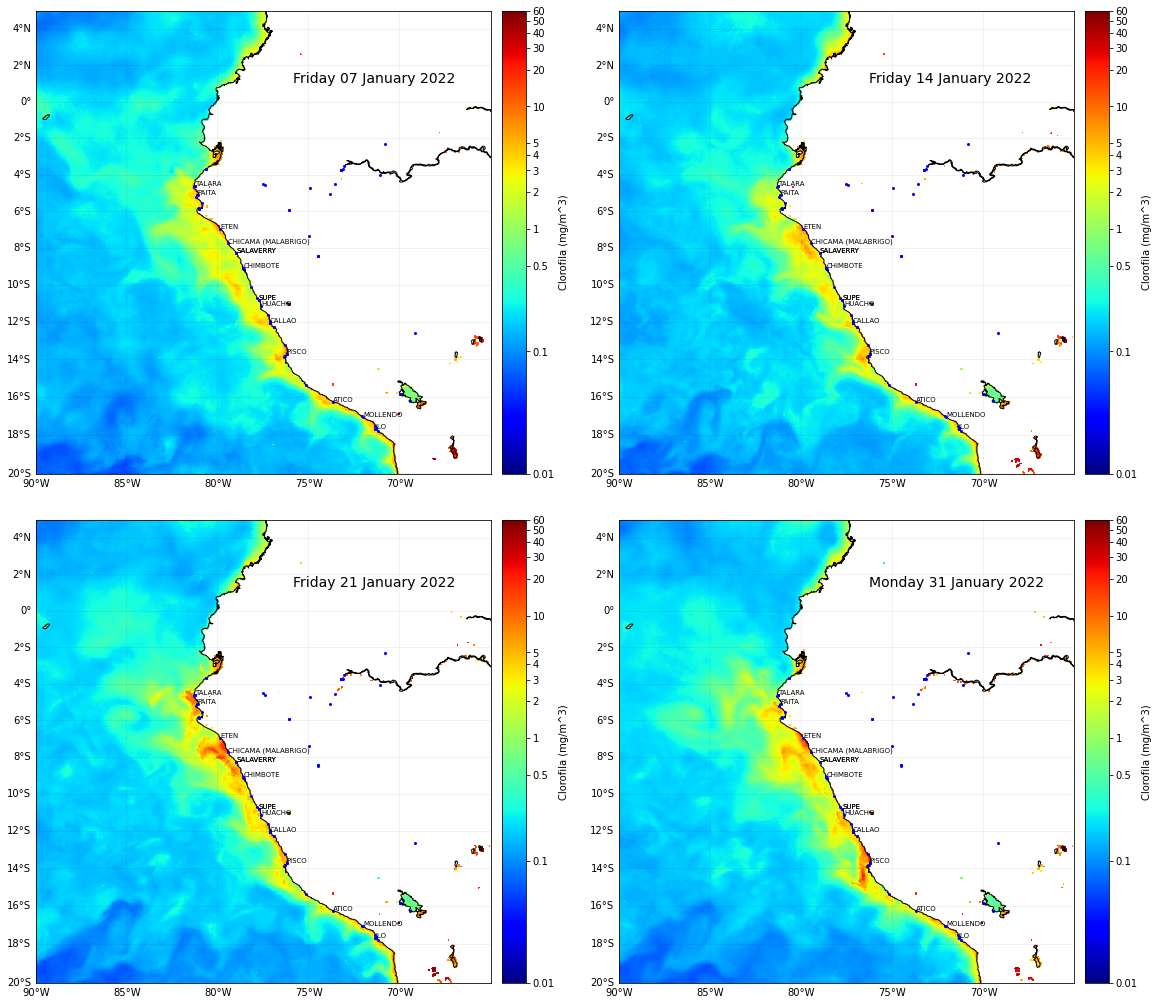

In [ ]:
rcParams['figure.subplot.left'] = 0.1   # move left edge of subplot over a bit
rcParams['figure.subplot.right'] = 0.9
rcParams['figure.subplot.top'] = 0.8
rcParams['figure.subplot.hspace'] = 0.1 # more height between subplots
rcParams['figure.subplot.wspace'] = 0.025 # more width between subplots

# panel 1
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221)
x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem1), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cb.set_label('Clorofila (mg/m^3)')
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii][0],fontsize=7)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.text(0.31, 0.75, str(fecha_sem1.strftime("%A %d %B %Y")), fontsize=14, transform=plt.gcf().transFigure)


# panel 2
ax = fig.add_subplot(222)
x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem2), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii][0],fontsize=7)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])
cb.set_label('Clorofila (mg/m^3)')
mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.text(0.71, 0.75, str(fecha_sem2.strftime("%A %d %B %Y")), fontsize=14, transform=plt.gcf().transFigure)

#panel 3
ax = fig.add_subplot(223)

x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem3), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cb.set_label('Clorofila (mg/m^3)')
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii][0],fontsize=7)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.text(0.31, 0.4, str(fecha_sem3.strftime("%A %d %B %Y")), fontsize=14, transform=plt.gcf().transFigure)

#panel 4
ax = fig.add_subplot(224)

x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem4), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cb.set_label('Clorofila (mg/m^3)')
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii][0],fontsize=7)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.text(0.71, 0.4, str(fecha_sem4.strftime("%A %d %B %Y")), fontsize=14, transform=plt.gcf().transFigure)

#Finalmente se debe guardar la figura como png
plt.savefig('/content/Clorofila'+'-'+str(fecha_sem2.strftime("%A %d %B %Y"))+'.png',
   format='png', dpi=600, transparent=False)

#Hacemos una copia para el drive compartido
plt.savefig('/content/drive/MyDrive/clorofila'+'-'+str(fecha_sem2.strftime("%A %d %B %Y"))+'.png',
   format='png', dpi=600, transparent=False)


##Futuras actualizaciones

In [ ]:
fnc="enero_2022/current_en2022.nc"
cur_data=Dataset(fnc)

In [ ]:
cur_data.variables

{'depth': <class 'netCDF4._netCDF4.Variable'>
 float32 depth(depth)
     valid_min: 0.494025
     valid_max: 0.494025
     units: m
     positive: down
     unit_long: Meters
     long_name: Depth
     standard_name: depth
     axis: Z
     _CoordinateAxisType: Height
     _CoordinateZisPositive: down
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     valid_min: -20.0
     valid_max: 5.0
     step: 0.08333588
     units: degrees_north
     unit_long: Degrees North
     long_name: Latitude
     standard_name: latitude
     axis: Y
     _CoordinateAxisType: Lat
 unlimited dimensions: 
 current shape = (301,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     valid_min: -90.0
     valid_max: -65.0
     step: 0.08332825
     units: degrees_east
     unit_lo

In [ ]:
#variables de long, latitud, tiempo
latc = cur_data.variables['latitude'][:]
lonc = cur_data.variables['longitude'][:]
timec = cur_data.variables['time'][:]

print(timec)

[631164. 631188. 631212. 631236. 631260. 631284. 631308. 631332. 631356.
 631380. 631404. 631428. 631452. 631476. 631500. 631524. 631548. 631572.
 631596. 631620. 631644. 631668. 631692. 631716. 631740. 631764. 631788.
 631812. 631836. 631860. 631884.]


In [ ]:
#encontrando el dia 1 o dia de creacion
creation_dayc = cur_data.variables['time'].units[12:22]
#print('El dia de creacion fue ',creation_day)
yyc=int(creation_dayc[:4]); mmc=int(creation_dayc[5:7]); ddc=int(creation_dayc[8:10])  
print('año de creacion:',yyc); print('mes de creacion:',mmc); print('dia de creacion:',ddc)

año de creacion: 1950
mes de creacion: 1
dia de creacion: 1


In [ ]:
#fecha=date.fromordinal(int(time+np.array(date.toordinal(date(yy,mm,dd)))))

fechac=(timec/24)+np.array(date.toordinal(date(yyc,mmc,ddc)))
#Fecha en forma de vector de tiempo
fechac

masked_array(data=[738156.5, 738157.5, 738158.5, 738159.5, 738160.5,
                   738161.5, 738162.5, 738163.5, 738164.5, 738165.5,
                   738166.5, 738167.5, 738168.5, 738169.5, 738170.5,
                   738171.5, 738172.5, 738173.5, 738174.5, 738175.5,
                   738176.5, 738177.5, 738178.5, 738179.5, 738180.5,
                   738181.5, 738182.5, 738183.5, 738184.5, 738185.5,
                   738186.5],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False],
       fill_value=1e+20)

In [ ]:
#previsualizacion de los datos para el dia 1 del mes seleccionado
#uvel = cur_data.variables['uo'][:][0,:,:,:]
uvel = cur_data.variables['uo'][:][0,0,:,:]
vvel = cur_data.variables['vo'][:][0,0,:,:]

In [ ]:
#reshape
np.transpose(uvel[:, :], (1,0))
np.transpose(vvel[:, :], (1,0))

masked_array(
  data=[[-0.06836146116256714, -0.06775109097361565,
         -0.06469924002885818, ..., 0.25025177747011185,
         0.25147251784801483, 0.25086214765906334],
        [-0.05859553813934326, -0.05615405738353729,
         -0.051271095871925354, ..., 0.2557451091706753,
         0.25696584954857826, 0.25818658992648125],
        [-0.05737479776144028, -0.051881466060876846,
         -0.04516739398241043, ..., 0.25879696011543274,
         0.25940733030438423, 0.2618488110601902],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=

In [ ]:
area_centro=[-90,-65, -20, 5]
mp = Basemap(projection ='merc',
             llcrnrlon=int(area_centro[0]),
             llcrnrlat=int(area_centro[2]),
             urcrnrlon=int(area_centro[1]),
             urcrnrlat=int(area_centro[3]),
             resolution='i')

lonic,latic = np.meshgrid(lonc,latc)



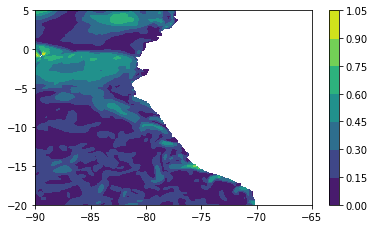

In [ ]:
uv= (uvel**2 + vvel**2)**0.5
plt.contourf(lonc,latc,uv)
plt.colorbar()

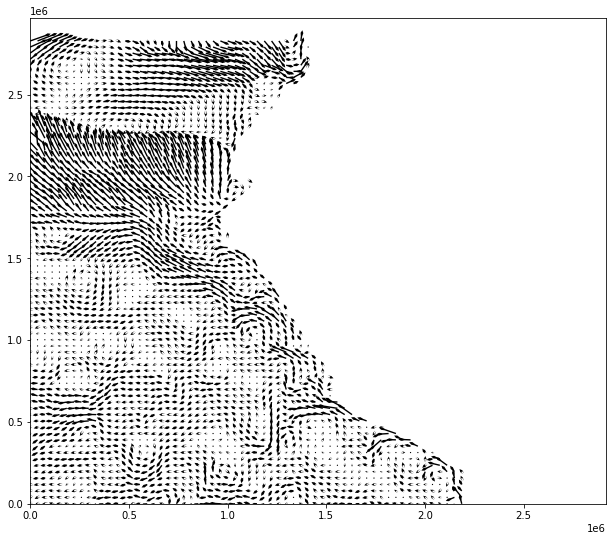

In [ ]:
#skip = (slice(None, None, 3), slice(None, None, 3))
n=4
fig,ax = subplots(figsize=(10,10))
#ax.quiver(lonc, latc, uvel, vvel,color='black', headwidth=1, scale = 20, headlength=1, regrid_shape=20)
ax.contourf(lonc,latc,uv)
ax.quiver(x[::n,::n], y[::n,::n], uvel[::n,::n], vvel[::n,::n],color='black', headwidth=2, scale = 20, headlength=2)
#ax.set_aspect('equal')


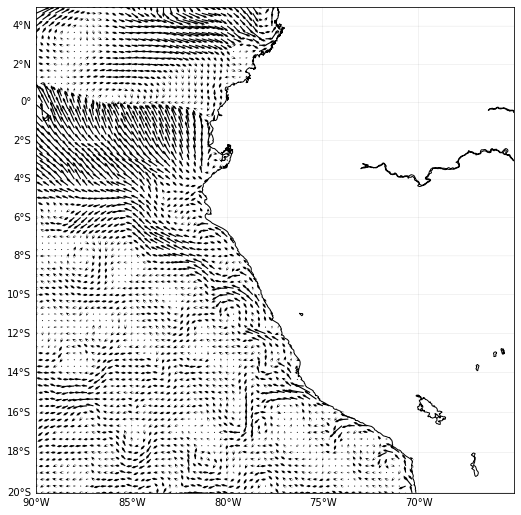

In [ ]:
from matplotlib.pyplot import *
fig=plt.figure(figsize=(15,10))
x,y = mp(lonic,latic)

quiver(x[::n,::n], y[::n,::n], uvel[::n,::n], vvel[::n,::n],color='black', headwidth=2, scale = 20, headlength=2)
#cs = mp.pcolormesh(x, y, np.log10(clorofila), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
#cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)

#cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
#cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')
plt.show()


Text(0.6, 0.78, 'Friday 07 January 2022')

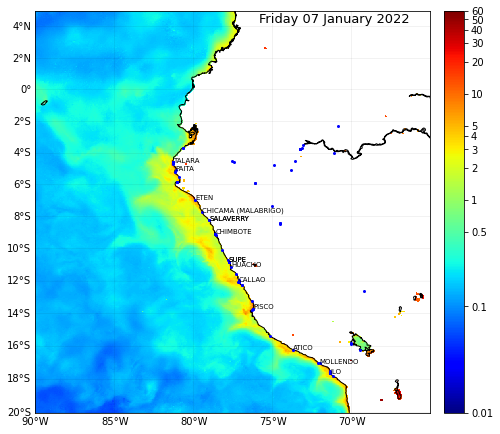

In [ ]:
fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem1), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii][0],fontsize=7)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.text(0.6, 0.78, str(fecha_sem1.strftime("%A %d %B %Y")), fontsize=13, transform=plt.gcf().transFigure)

In [ ]:
#import scipy.io as sio
#mat=sio.loadmat('file.mat')# load mat-file
#mdata = mat['myVar']  # variable in mat file 
#ndata = {n: mdata[n][0,0] for n in mdata.dtype.names}
#Columns = [n for n, v in ndata.items() if v.size == 1]
#d=dict((c, ndata[c][0]) for c in Columns)
#df=pd.DataFrame.from_dict(d)
#display(df)

#plt.plot(lon,lat,color='black', linestyle='dashed',linewidth=0.1,marker='o',markerfacecolor='green',markersize=5)
#plt.xlabel('Longitud')
#plt.ylabel('Latitud')
#plt.title('2020-01 to 2021-03-27 Floats trajectory in 112ºW-108ºW / 1ºN-1ºS')

In [ ]:
#plt.plot(sudamerica['X'],sudamerica['Y'])
#plt.plot(sudamerica['X'][0],sudamerica['Y'][0])
#!pip install fiona
#import fiona
#shape = fiona.open(sudamerica)